In [91]:
%%capture
!pip install apimoex
!pip install requests pandas
!pip install requests beautifulsoup4
!pip install mpl_finance
!pip install mplfinance

In [92]:
import pandas as pd
import numpy as np
import requests
import apimoex
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from bs4 import BeautifulSoup
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as sts
from mpl_finance import candlestick_ohlc 
import matplotlib.dates as mpl_dates 
import mpl_finance

In [93]:
df_ROSN = pd.read_csv('ROSN_after_EDA.csv')  
df_SBER = pd.read_csv('SBER_after_EDA.csv')  
df_LKOH = pd.read_csv('LKOH_after_EDA.csv')  
df_SI = pd.read_csv('SI_after_EDA.csv')  
df_BR = pd.read_csv('BR_after_EDA.csv')  
df_IMOEX = pd.read_csv('IMOEX_after_EDA.csv')  
df_STOCK_AGGREGATE = pd.read_csv('df_STOCK_AGGREGATE.csv')  

In [94]:
df_IMOEX.set_index('TRADEDATE', inplace=True)
df_STOCK_AGGREGATE.set_index('TRADEDATE', inplace=True)
df_BR.set_index('TRADEDATE', inplace=True)
df_SI.set_index('TRADEDATE', inplace=True)

## **Визуализация**

In [95]:
df_prices = pd.DataFrame(columns=['TRADEDATE', 'WAPRICE_ROSN', 'WAPRICE_SBER', 'WAPRICE_LKOH', 'WAPRICE_BR', 'WAPRICE_SI'])

In [96]:
df_prices.set_index('TRADEDATE', inplace=True)

In [97]:
df_prices["WAPRICE_ROSN"] = df_STOCK_AGGREGATE[df_STOCK_AGGREGATE['SECID'] == 'ROSN']['WAPRICE']
df_prices["WAPRICE_SBER"] = df_STOCK_AGGREGATE[df_STOCK_AGGREGATE['SECID'] == 'SBER']['WAPRICE']
df_prices["WAPRICE_LKOH"] = df_STOCK_AGGREGATE[df_STOCK_AGGREGATE['SECID'] == 'LKOH']['WAPRICE']
df_prices["WAPRICE_BR"] = df_BR['WAPRICE']
df_prices["WAPRICE_SI"] = df_SI['WAPRICE']

In [98]:
df_prices.dropna(inplace = True)

Мы взяли средние цены за торговый день для акций и фьючерсов для того, чтобы отражение динамики котировок было более репрезентативным и избежать внутридневной волатильности и связанной с ней искажений тренда.

In [99]:
df_prices

,WAPRICE_ROSN,WAPRICE_SBER,WAPRICE_LKOH,WAPRICE_BR,WAPRICE_SI
TRADEDATE,,,,,
2021-01-05,442.10,273.12,5278.0,51.73,75122.0
2021-01-06,449.25,273.49,5369.5,53.76,74323.0
2021-01-08,473.20,280.74,5509.0,54.69,74709.0
2021-01-11,473.05,288.30,5572.0,55.41,75069.0
2021-01-12,474.15,291.70,5685.0,56.23,74689.0
...,...,...,...,...,...
2024-03-25,552.70,293.57,7374.0,86.17,95246.0
2024-03-26,555.70,294.23,7413.5,86.64,95010.0
2024-03-27,554.10,294.37,7449.5,85.80,94800.0


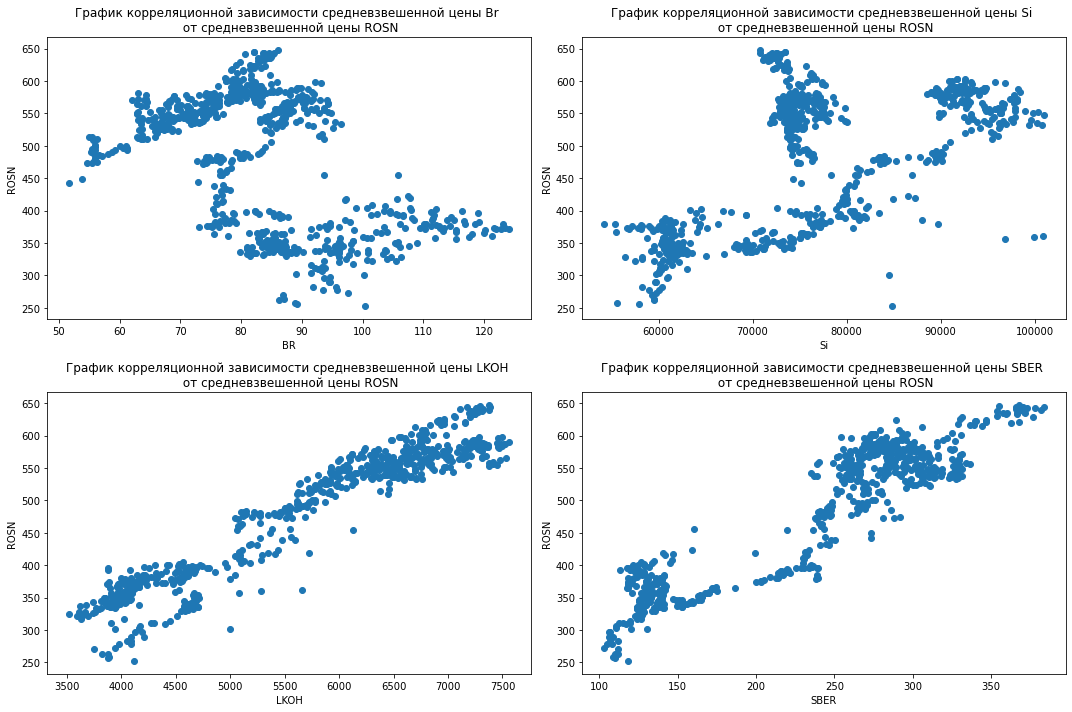

In [100]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), tight_layout=True)


ax[0][0].scatter(df_prices['WAPRICE_BR'], df_prices['WAPRICE_ROSN'])
ax[0][0].set_xlabel('BR')
ax[0][0].set_ylabel('ROSN')
ax[0][0].set_title("График корреляционной зависимости средневзвешенной цены Br \n от средневзвешенной цены ROSN")

ax[0][1].scatter(df_prices['WAPRICE_SI'], df_prices['WAPRICE_ROSN'])
ax[0][1].set_xlabel('Si')
ax[0][1].set_ylabel('ROSN')
ax[0][1].set_title("График корреляционной зависимости средневзвешенной цены Si \n от средневзвешенной цены ROSN")

ax[1][0].scatter(df_prices['WAPRICE_LKOH'], df_prices['WAPRICE_ROSN'])
ax[1][0].set_xlabel('LKOH')
ax[1][0].set_ylabel('ROSN')
ax[1][0].set_title("График корреляционной зависимости средневзвешенной цены LKOH \n от средневзвешенной цены ROSN")

ax[1][1].scatter(df_prices['WAPRICE_SBER'], df_prices['WAPRICE_ROSN'])
ax[1][1].set_xlabel('SBER')
ax[1][1].set_ylabel('ROSN')
ax[1][1].set_title("График корреляционной зависимости средневзвешенной цены SBER \n от средневзвешенной цены ROSN")

plt.show()

Text(0.5, 1.0, 'Correlation heatmap')

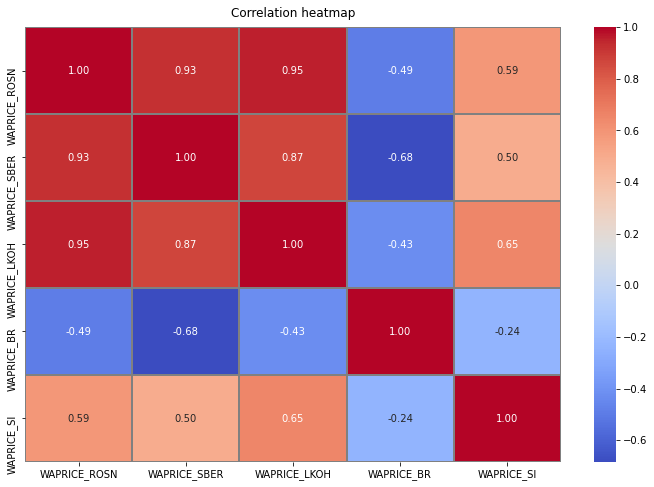

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_prices.corr(), fmt='.2f', annot=True, mask = np.abs(df_prices.corr()) <= 0.2, cmap='coolwarm',
            linewidths=1, linecolor='grey')
plt.title('Correlation heatmap', pad=10)

Высокая корреляция между средними ценами котировок акций таких компаний, как Роснефть и Сбербанк, может быть обусловлена несколькими факторами:

Роснефть и Сбербанк являются крупнейшими компаниями в России и играют значительную роль в экономике страны. Изменения в экономической политике, макроэкономические показатели и политическая обстановка часто оказывают схожее воздействие на финансовое состояние и стоимость акций обеих компаний. Например, рост ВВП, изменение курса рубля, или новые экономические санкции могут одновременно повлиять на доходность и риски как в нефтегазовом, так и в банковском секторе.

Инвесторы могут воспринимать крупные компании, такие как Роснефть и Сбербанк, как индикаторы общего состояния рынка. В периоды экономической стабильности или нестабильности акции обеих компаний могут испытывать схожие тренды роста или падения, так как инвесторы одинаково реагируют на новости, касающиеся экономики России.

Взаимозависимость секторов: Нефтегазовый сектор и банковский сектор тесно связаны. Роснефть как крупнейшая нефтегазовая компания имеет значительное влияние на экономические показатели страны, что, в свою очередь, влияет на банковский сектор. 

Сбербанк, как крупнейший кредитор, может быть непосредственно заинтересован в финансовом состоянии и проектах Роснефти, что также вносит вклад в корреляцию их акций.

Как крупные компоненты российского фондового рынка, акции Роснефти и Сбербанка могут следовать общим трендам рынка, отражая движения основных рыночных индексов, таких как МосБиржа или RTS. Это также способствует их взаимной корреляции.

Таким образом, высокая корреляция между ценами акций Роснефти и Сбербанка может быть следствием их взаимной зависимости от общих экономических условий, политических изменений, а также реакции инвесторов на эти факторы. Это явление часто наблюдается для крупных компаний, которые играют ключевую роль в экономике своей страны.

Теперь объясним корреляцию между ROSN и SI. При укреплении рубля (снижении стоимости доллара к рублю) доходы от продажи нефти за рубежом, конвертированные в рубли, уменьшаются, что может негативно сказываться на финансовых результатах компании и, соответственно, на стоимости её акций. Если же рубль ослабевает, доходы в рублевом эквиваленте увеличиваются, что потенциально положительно влияет на акции компании.

Далее мы решили перевести стоимость фьючерса на нефть в рубли, используя ранее спарсенный фьючерс SI "Фьючерс на доллар-рубль." Для измерения более корректных корреляций, приведенных в одну валюту величин. Для этого был создан новый признак:

Отрицательную корреляцию между стоимостями акций Роснефти ROSN и стоимостями нефти BR можно объяснить тем, что в рассматриваемый период рост стоимости нефти зачастую был связан с различными геополитическими шоками, в результате которых стоимость акций Роснефти падала. Более того, дальнейшее санкционное давление, введение потолков на цены на российскую нефть и проблемы с транспортировкой нефти еще больше снизили корреляцию между ценами акций Роснефти и ценами на нефть, скорее всего, после 22 года основным фактором влияния на акции была именно геополитическая обстановка, а не цены на нефть.

In [102]:
df_prices['WAPRICE_BR_RUB'] = df_prices['WAPRICE_BR']*df_prices['WAPRICE_SI']/1000

In [103]:
df_prices

,WAPRICE_ROSN,WAPRICE_SBER,WAPRICE_LKOH,WAPRICE_BR,WAPRICE_SI,WAPRICE_BR_RUB
TRADEDATE,,,,,,
2021-01-05,442.10,273.12,5278.0,51.73,75122.0,3886.06106
2021-01-06,449.25,273.49,5369.5,53.76,74323.0,3995.60448
2021-01-08,473.20,280.74,5509.0,54.69,74709.0,4085.83521
2021-01-11,473.05,288.30,5572.0,55.41,75069.0,4159.57329
2021-01-12,474.15,291.70,5685.0,56.23,74689.0,4199.76247
...,...,...,...,...,...,...
2024-03-25,552.70,293.57,7374.0,86.17,95246.0,8207.34782
2024-03-26,555.70,294.23,7413.5,86.64,95010.0,8231.66640
2024-03-27,554.10,294.37,7449.5,85.80,94800.0,8133.84000


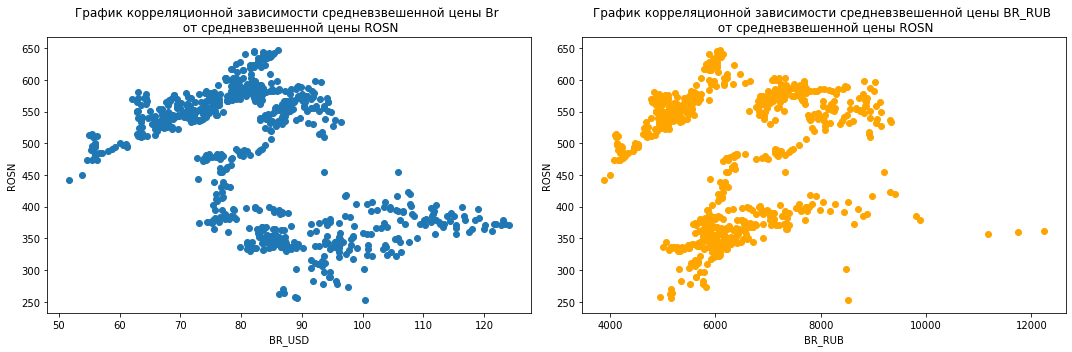

In [104]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), tight_layout=True)


ax[0].scatter(df_prices['WAPRICE_BR'], df_prices['WAPRICE_ROSN'])
ax[0].set_xlabel('BR_USD')
ax[0].set_ylabel('ROSN')
ax[0].set_title("График корреляционной зависимости средневзвешенной цены Br \n от средневзвешенной цены ROSN")

ax[1].scatter(df_prices['WAPRICE_BR_RUB'], df_prices['WAPRICE_ROSN'], color = 'orange')
ax[1].set_xlabel('BR_RUB')
ax[1].set_ylabel('ROSN')
ax[1].set_title("График корреляционной зависимости средневзвешенной цены BR_RUB \n от средневзвешенной цены ROSN")


plt.show()

Мы получили тоже самое, что впринципе логично в силу линейности (инвариантности) коэффициента корреляции пирсона и scatter plot относительно домножения одного признака на константу (Хотя это не столь очевидно). Так как SI также менялось со времени.

Далее мы решили посмотреть на то, как менялись средние цены по каждой переменной со временем.

In [105]:
date = df_prices.index

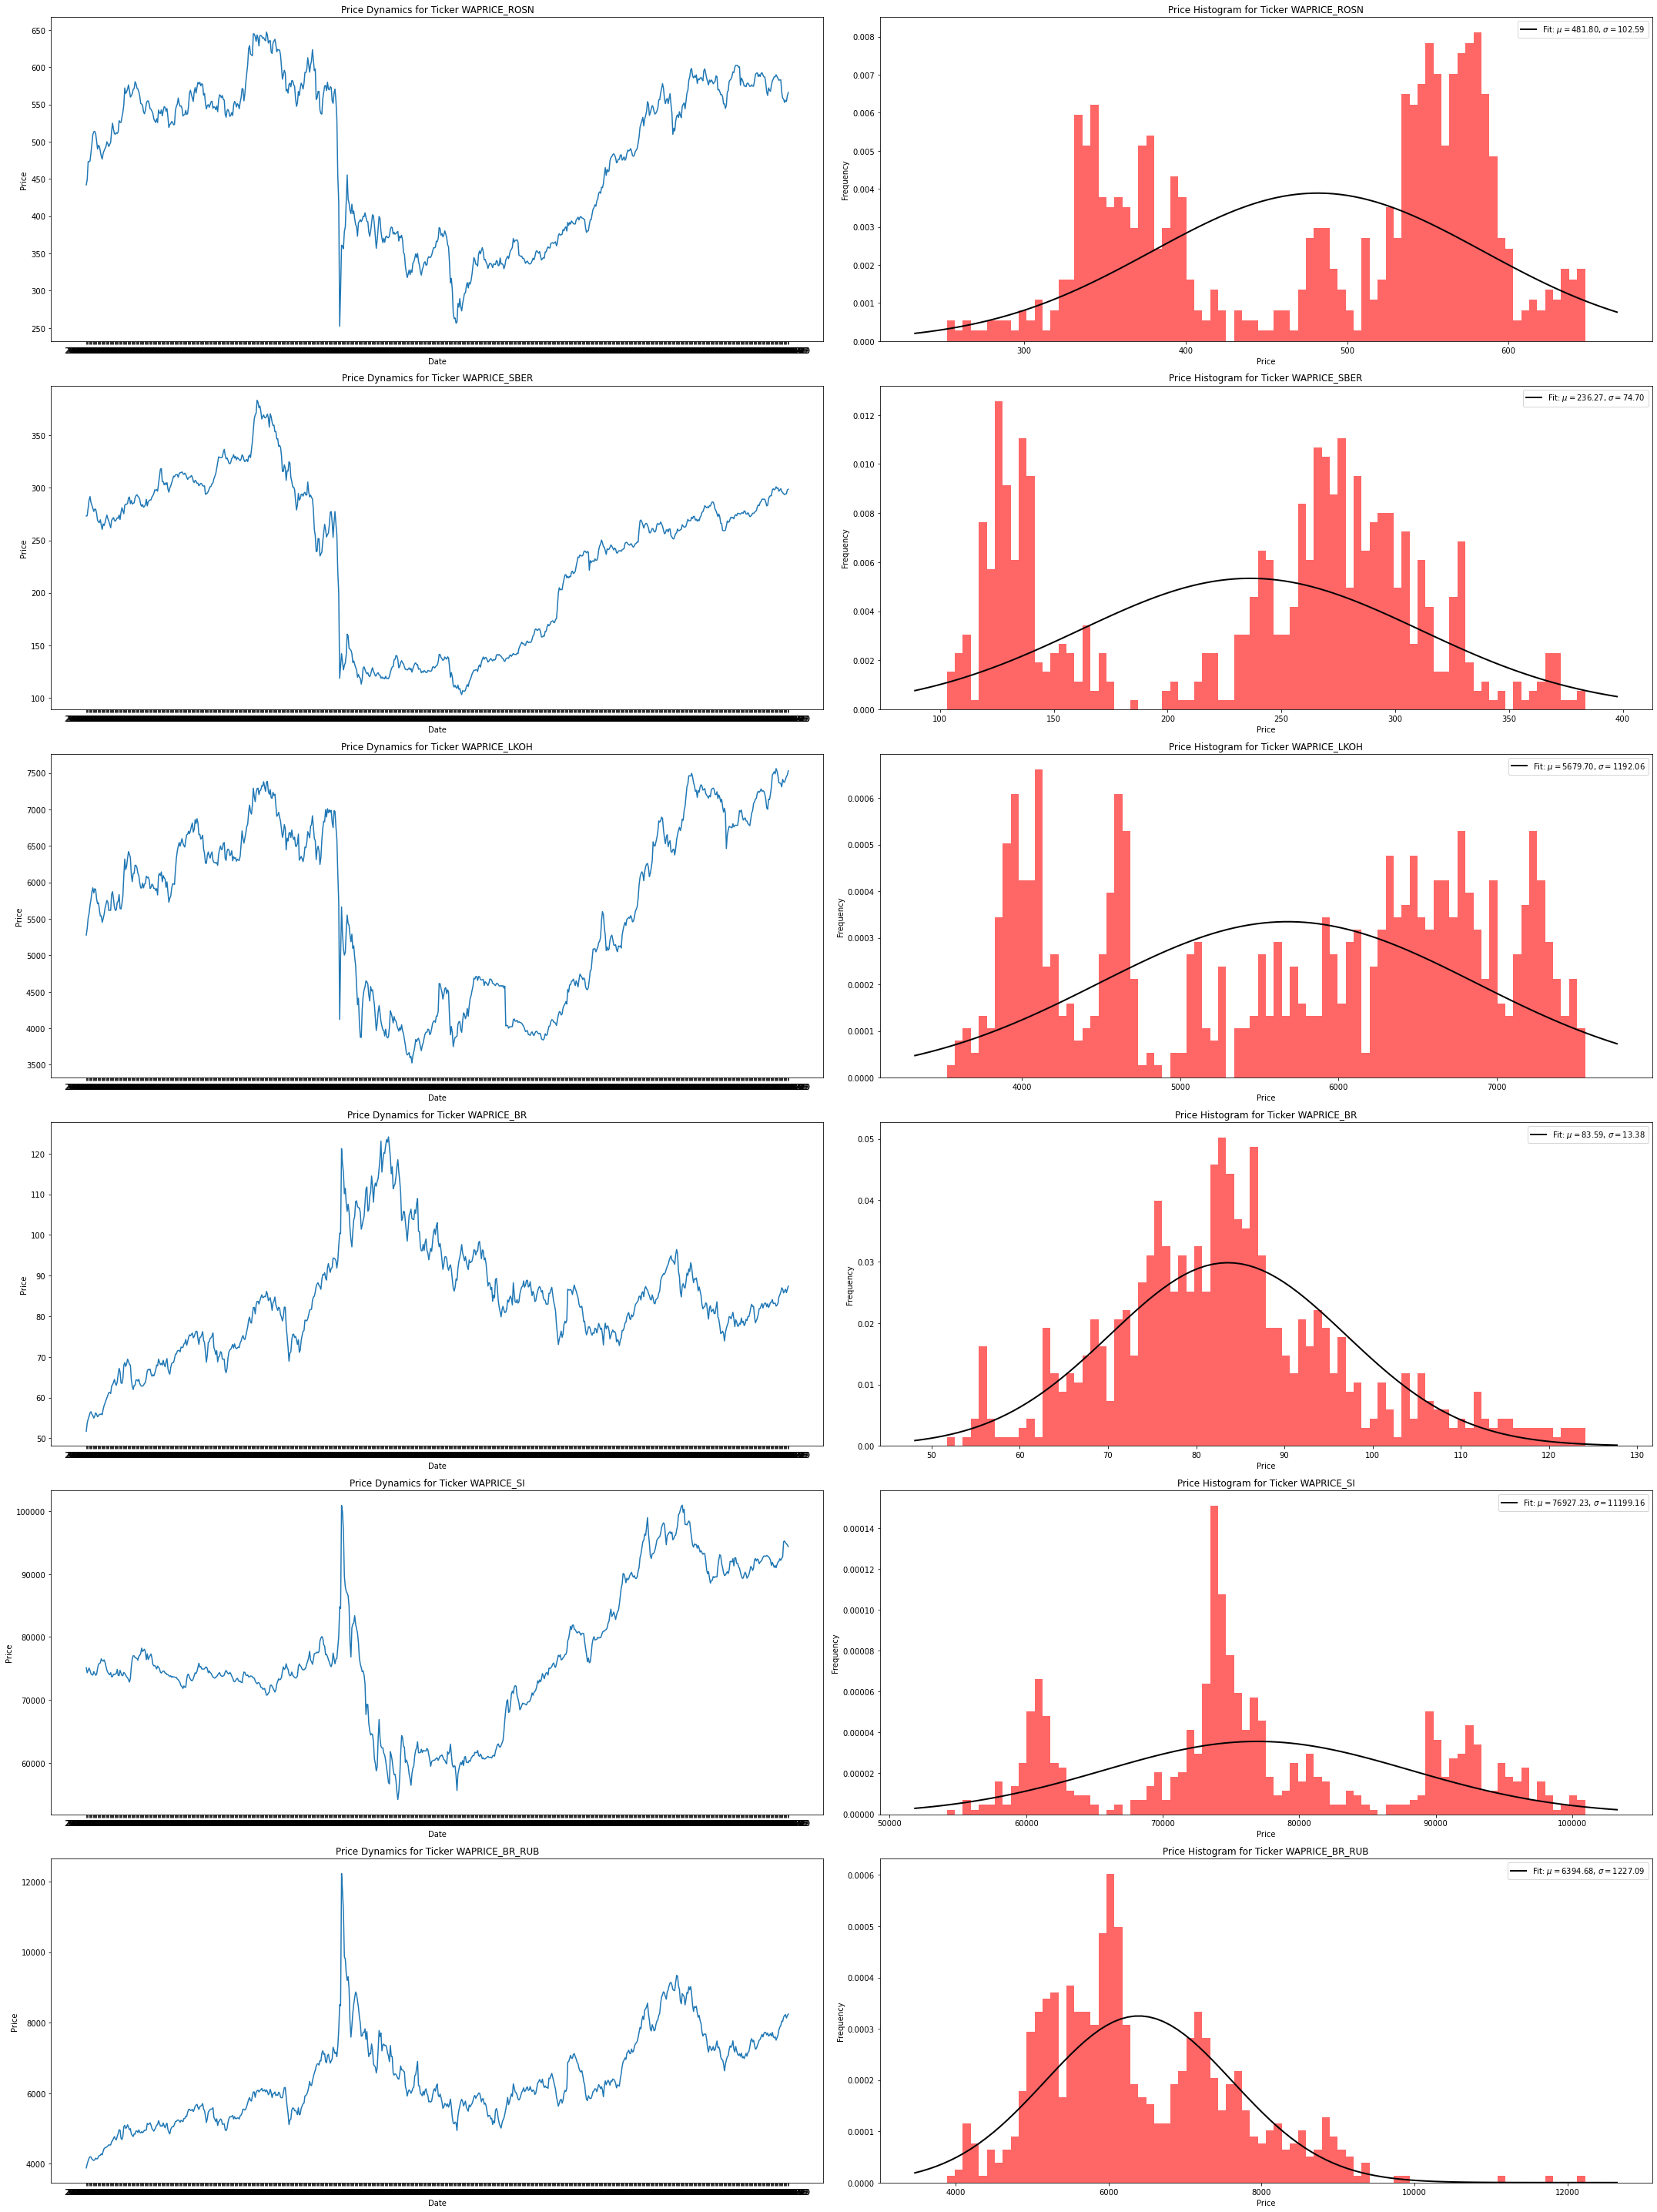

In [106]:
fig, ax = plt.subplots(6, 2, figsize=(30, 40))

tickers = ['WAPRICE_ROSN', 'WAPRICE_SBER', 'WAPRICE_LKOH', 'WAPRICE_BR', 'WAPRICE_SI', 'WAPRICE_BR_RUB']

for i, ticker in enumerate(tickers):

    ax[i, 0].plot(df_prices.index, df_prices[ticker].dropna(), label=ticker)
    ax[i, 0].set_title(f'Price Dynamics for Ticker {ticker}')
    ax[i, 0].set_xlabel('Date')
    ax[i, 0].set_ylabel('Price')
    

    ax[i, 1].hist(df_prices[ticker].dropna(), bins=80, color='red', density=True, alpha=0.6)
    ax[i, 1].set_title(f'Price Histogram for Ticker {ticker}')
    ax[i, 1].set_xlabel('Price')
    ax[i, 1].set_ylabel('Frequency')
    
    mu, std = norm.fit(df_prices[ticker].dropna())
    xmin, xmax = ax[i, 1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    ax[i, 1].plot(x, p, 'k', linewidth=2, label=f'Fit: $\mu={mu:.2f}$, $\sigma={std:.2f}$')
    ax[i, 1].legend()

plt.tight_layout()
plt.show()


На гистограммах стоимостей всех акций - SBER, LKOH и ROSN наблюдается два пика. Это можно объяснить тем, что до начала СВО в 2022 году акции российских компаний торговались по сравнительно высоким ценам. После начала СВО они одномоментно упали до гораздо более низких значений, где торговались достаточно долгое время, после чего они относительно быстро отрасли, ввиду чего на гистограмме мы довольно мало видим средних значений.
Околонормальное распределение цен на нефть BR объясняется тем, что фьючерсная цена на нефть не была подвержена сильному падению после начала СВО и фактору санкционного давления.

Мы решили отдельно выделить график динамики Росснефти, с использованием дневных свеч. Так как котировки акций Ростефти является основной переменной в дальнейшем наализе. На основании анализа графика акций "ROSN" можно увидеть, что цены на акции испытали значительный спад в начале специальной военной операции (СВО), что отражает общую тенденцию нестабильности на рынке в этот период. После первоначального падения цены начали восстанавливаться с начала 2023 года, хотя и не достигли предыдущего пикового уровня. Это восстановление может быть связано с адаптацией рынка к изменяющимся экономическим условиям и возможным улучшением инвестиционного климата.Тем не менее, общий тренд за период с 2021 по 2024 годы остаётся слегка отрицательным. Это указывает на то, что, несмотря на частичное восстановление, рынок еще полностью не оправился от шоков, вызванных началом СВО и последующими экономическими вызовами. Слегка отрицательный тренд может отражать преобладание осторожности среди инвесторов и недостаточную уверенность в быстром восстановлении к предыдущим уровням роста.

In [107]:
data = df_STOCK_AGGREGATE[df_STOCK_AGGREGATE['SECID'] == 'ROSN']

ohlc = data.loc[:, ['OPEN', 'HIGH', 'LOW', 'CLOSE']]

ohlc['Date'] = data.index
ohlc['Date'] = pd.to_datetime(ohlc['Date']).map(mpl_dates.date2num)  # Преобразование даты для mpl
ohlc = ohlc[['Date', 'OPEN', 'HIGH', 'LOW', 'CLOSE']]  # Переупорядочивание столбцов для соответствия формату OHLC
ohlc = ohlc.astype(float)  # Убедимся, что все данные в float

print(ohlc.head())

               Date    OPEN    HIGH    LOW   CLOSE
TRADEDATE                                         
2021-01-04  18631.0  435.85  442.60  433.0  436.00
2021-01-05  18632.0  436.00  450.70  433.3  449.35
2021-01-06  18633.0  449.35  454.65  443.7  453.70
2021-01-08  18635.0  465.10  481.00  463.8  478.20
2021-01-11  18638.0  474.55  480.10  464.0  473.25


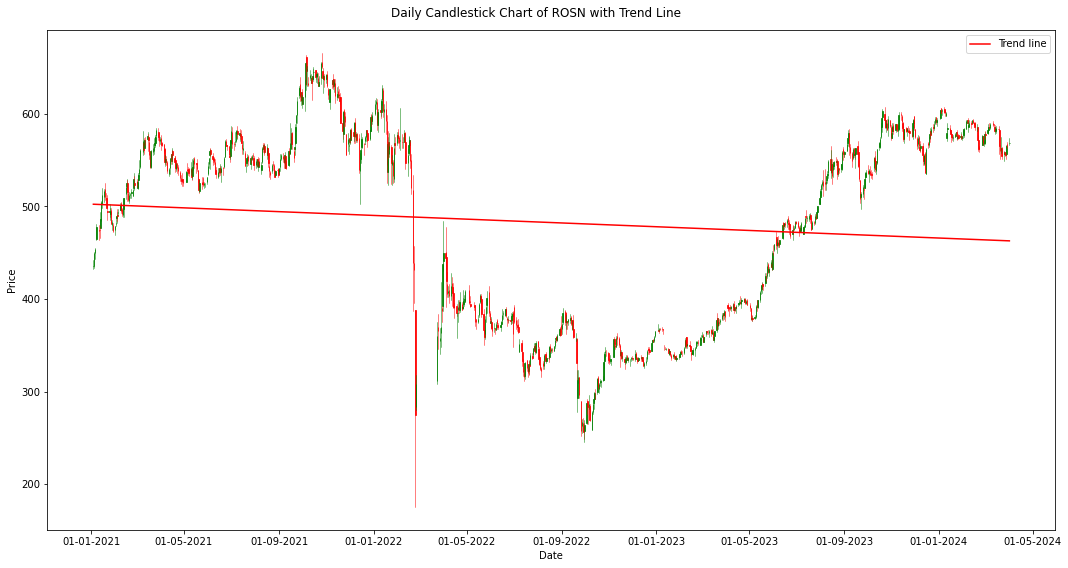

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.xaxis_date()
ax.xaxis.set_major_formatter(mpl_dates.DateFormatter('%d-%m-%Y'))

x = ohlc['Date']
y = ohlc['CLOSE']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

ax.plot(x, m*x + c, 'r', label='Trend line')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of ROSN with Trend Line')

ax.legend()

fig.tight_layout()

plt.show()

Поскольку нам необходимы были данные об изменениях цены за период торгов по фьючерсам на нефть и рубль-доллар. Эти данные пришлось создавать в качестве нового признака по формуле:
$$\Delta_{BR} = \dfrac{CLOSE(P_{BR})-OPEN(P_{BR})}{OPEN(P_{BR})} \cdot 100\%$$




$$\Delta_{SI} = \dfrac{CLOSE(P_{SI})-OPEN(P_{SI})}{OPEN(P_{SI})}\cdot 100\%$$

In [109]:
df_prices['Delta_ROSN'] = df_STOCK_AGGREGATE[df_STOCK_AGGREGATE['SECID'] == 'ROSN']['TRENDCLSPR']
df_prices['Delta_SBER'] = df_STOCK_AGGREGATE[df_STOCK_AGGREGATE['SECID'] == 'SBER']['TRENDCLSPR']
df_prices['Delta_LKOH'] = df_STOCK_AGGREGATE[df_STOCK_AGGREGATE['SECID'] == 'LKOH']['TRENDCLSPR']

In [110]:
df_prices['Delta_BR'] = round((df_BR['CLOSE'] - df_BR['OPEN'])/df_BR['OPEN']*100,2)
df_prices['Delta_SI'] = round((df_SI['CLOSE'] - df_SI['OPEN'])/df_SI['OPEN']*100,2)

In [111]:
df_prices

,WAPRICE_ROSN,WAPRICE_SBER,WAPRICE_LKOH,WAPRICE_BR,WAPRICE_SI,WAPRICE_BR_RUB,Delta_ROSN,Delta_SBER,Delta_LKOH,Delta_BR,Delta_SI
TRADEDATE,,,,,,,,,,,
2021-01-05,442.10,273.12,5278.0,51.73,75122.0,3886.06106,3.06,1.18,2.80,3.18,0.33
2021-01-06,449.25,273.49,5369.5,53.76,74323.0,3995.60448,0.97,-0.82,0.34,2.63,-0.37
2021-01-08,473.20,280.74,5509.0,54.69,74709.0,4085.83521,5.40,3.92,3.35,2.04,0.46
2021-01-11,473.05,288.30,5572.0,55.41,75069.0,4159.57329,-1.04,2.06,0.76,0.23,0.71
2021-01-12,474.15,291.70,5685.0,56.23,74689.0,4199.76247,0.24,0.17,2.18,1.60,-1.54
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,552.70,293.57,7374.0,86.17,95246.0,8207.34782,0.69,0.31,1.85,1.21,-0.20
2024-03-26,555.70,294.23,7413.5,86.64,95010.0,8231.66640,-0.35,0.07,-0.26,-0.13,0.12
2024-03-27,554.10,294.37,7449.5,85.80,94800.0,8133.84000,-0.13,0.34,1.00,-0.60,-0.76


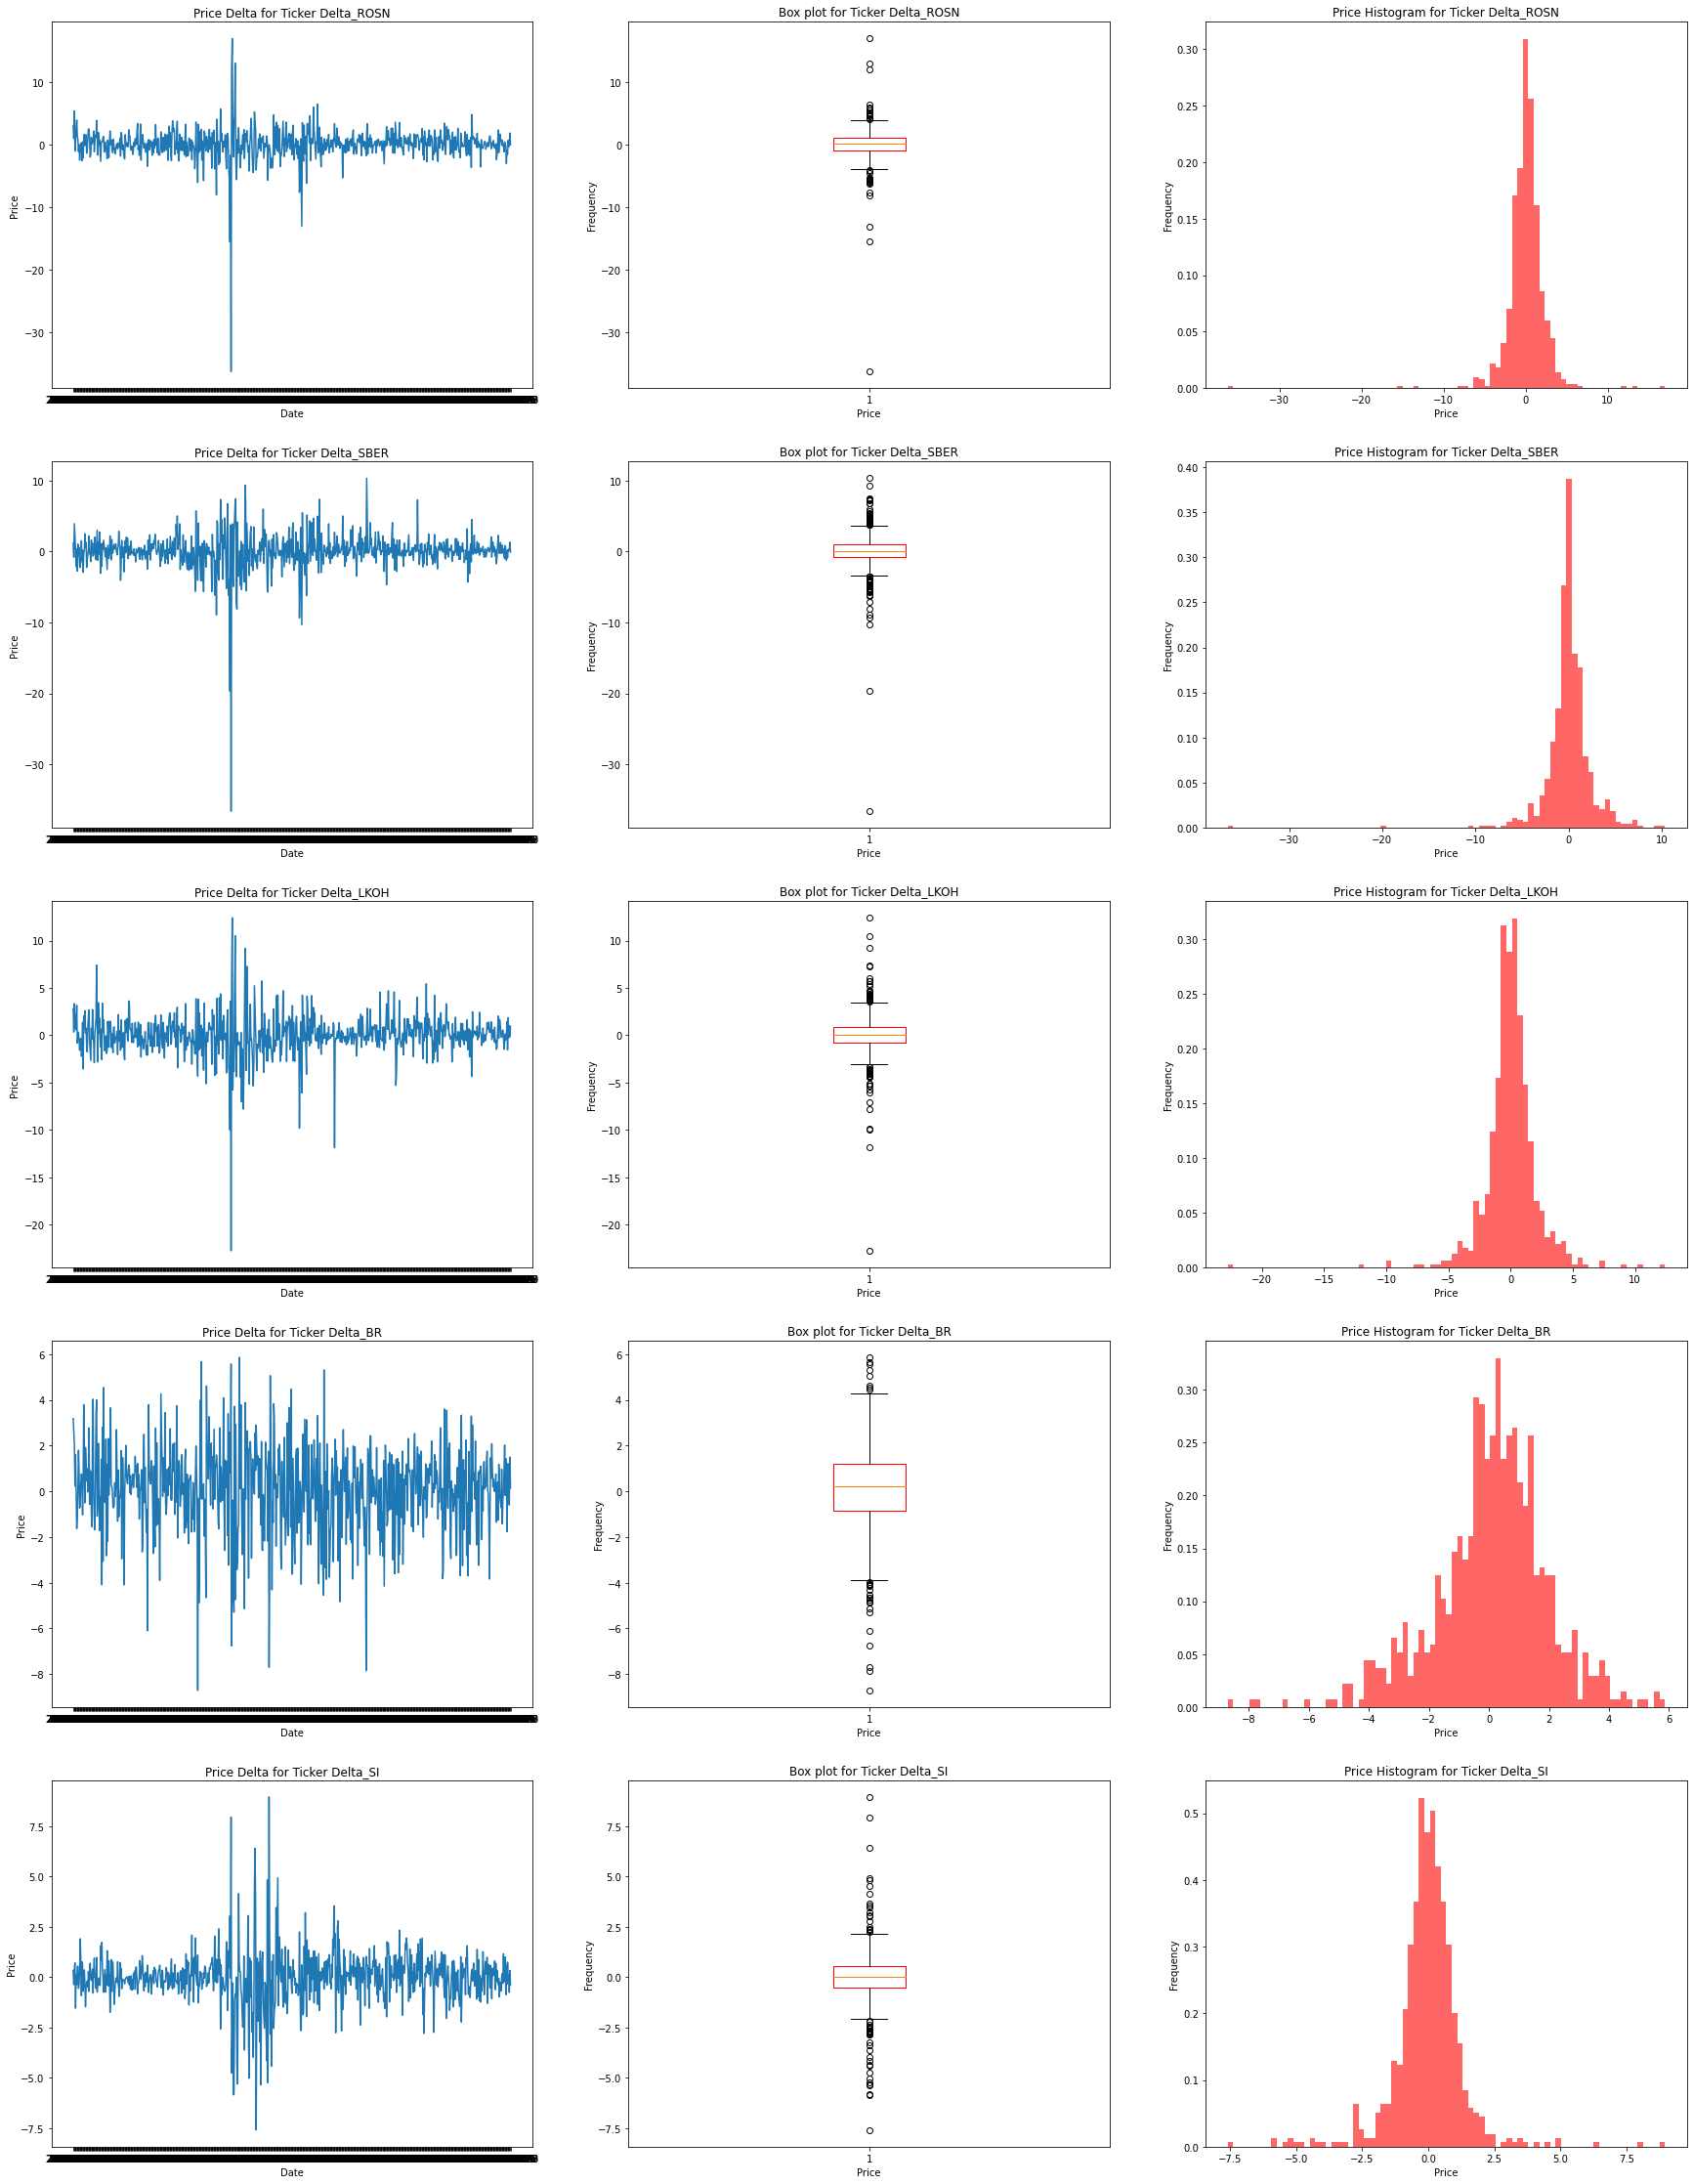

In [112]:
fig, ax = plt.subplots(5, 3, figsize=(30, 40))

tickers = ["Delta_ROSN", "Delta_SBER", "Delta_LKOH", "Delta_BR", "Delta_SI"]

for i, ticker in enumerate(tickers):

    ax[i, 0].plot(df_prices.index, df_prices[ticker].dropna(), label=ticker)
    ax[i, 0].set_title(f'Price Delta for Ticker {ticker}')
    ax[i, 0].set_xlabel('Date')
    ax[i, 0].set_ylabel('Price')
    

    ax[i, 1].boxplot(df_prices[ticker].dropna(), boxprops=dict(color='red'))
    ax[i, 1].set_title(f'Box plot for Ticker {ticker}')
    ax[i, 1].set_xlabel('Price')
    ax[i, 1].set_ylabel('Frequency')
    
    ax[i, 2].hist(df_prices[ticker].dropna(), bins=80, color='red', density=True, alpha=0.6)
    ax[i, 2].set_title(f'Price Histogram for Ticker {ticker}')
    ax[i, 2].set_xlabel('Price')
    ax[i, 2].set_ylabel('Frequency')
    
plt.show()


Видим, что наши доходности достаточно волатильны - они подчиняются разным макро-трендам на рынке. 
Анализируя дельту изменения переменных по каждому из активов, можно заметить один значительный выброс, который связан с резкой просадкой рынка, вызванной началом специальной военной операции (СВО). Остальные выбросы могут быть опущены в силу потребностей нашего проекта так как являются малозначащими с точки зрения исторических событий и экономической интуиции.

Далее мы решили построить Vega коэффициент чувствительности дельты дневной стоимости акции в зависимости от ее стоимости.

$$V=\dfrac{\text{Изменение стоимости актива}}{\text{Изменение ожидаемой волатильности}}$$

Да, коэффициент Vega (также известный как "каппа" или "омега" в некоторых текстах) — это мера чувствительности цены ценной бумаги к изменению волатильности базового актива. Vega — это один из греков опционов (помимо таких как дельта, гамма, тета и ро), который используется для оценки риска и чувствительности акционных позиций. Этот коэффициент важен, потому что волатильность является ключевым компонентом в формулах ценообразования опционов, например, в модели Блэка-Шоулза.

In [113]:
df_prices['ROSN_V'] = df_prices['WAPRICE_ROSN']/df_prices['Delta_ROSN']
df_prices['SBER_V'] = df_prices['WAPRICE_SBER']/df_prices['Delta_SBER']
df_prices['LKOH_V'] = df_prices['WAPRICE_LKOH']/df_prices['Delta_LKOH']

In [114]:
df_prices[df_prices['Delta_ROSN'] == 0]

,WAPRICE_ROSN,WAPRICE_SBER,WAPRICE_LKOH,WAPRICE_BR,WAPRICE_SI,WAPRICE_BR_RUB,Delta_ROSN,Delta_SBER,Delta_LKOH,Delta_BR,Delta_SI,ROSN_V,SBER_V,LKOH_V
TRADEDATE,,,,,,,,,,,,,,
2022-09-05,383.00,141.21,4610.0,97.86,61113.0,5980.51818,0.0,-1.95,1.37,-0.20,0.03,inf,-72.415385,3364.963504
2023-11-13,597.85,283.02,7286.5,82.34,93219.0,7675.65246,0.0,1.35,-0.15,0.56,-0.85,inf,209.644444,-48576.666667
2024-02-22,562.15,283.51,7002.5,83.04,92809.0,7706.85936,0.0,0.98,0.44,0.40,-0.18,inf,289.295918,15914.772727
2024-03-29,566.00,298.70,7529.5,87.40,94355.0,8246.62700,0.0,-0.09,0.94,0.15,-0.38,inf,-3318.888889,8010.106383


Есть значения, где в силу Delta_i = 0 значение коэффициента бесконечность. Подобные наблюдения мы решили скрыть.

In [115]:
df_prices = df_prices[np.isfinite(df_prices).all(axis=1)]

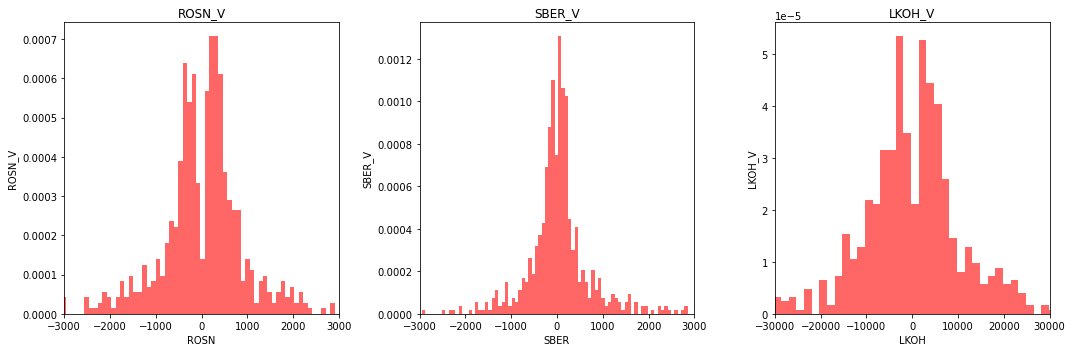

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), tight_layout=True)


ax[0].hist(df_prices['ROSN_V'], bins=800, color='red', density=True, alpha=0.6)
ax[0].set_xlim(-3000, 3000)
ax[0].set_xlabel('ROSN')
ax[0].set_ylabel('ROSN_V')
ax[0].set_title("ROSN_V")

ax[1].hist(df_prices['SBER_V'], bins=800, color='red', density=True, alpha=0.6)
ax[1].set_xlim(-3000, 3000)
ax[1].set_xlabel('SBER')
ax[1].set_ylabel('SBER_V')
ax[1].set_title("SBER_V")

ax[2].hist(df_prices['LKOH_V'], bins=800, color='red', density=True, alpha=0.6)
ax[2].set_xlim(-30000, 30000)
ax[2].set_xlabel('LKOH')
ax[2].set_ylabel('LKOH_V')
ax[2].set_title("LKOH_V")
plt.show()

In [117]:
df_prices['ROSN_V'].mean()

-93.64385988133456

In [118]:
df_prices['SBER_V'].mean()

-68.2950376151459

In [119]:
df_prices['LKOH_V'].mean()

976.7990896841907

Волатильность негативно влияет на цену акций, при этом распределение V похоже на нормальное, так как высокая волатильность свидетельствует о нестабильности котировки акции или фьючерса, что является негативным фактором для инвестора

Дальше был посчитан beta коэффициент. Который расчитывается как:

$$\beta=\dfrac{COV(r_i,r_m)}{\sigma_m^2}$$

где $r_i$ — оцениваемая величина, для которой вычисляется коэффициент Бета: доходность оцениваемого актива или портфеля, 
$r_m$ — эталонная величина, с которой происходит сравнение: доходность портфеля ценных бумаг или рынка, 
$COV(r_i,r_m$ — ковариация оцениваемой и эталонной величины, $\sigma_m^2$ — дисперсия эталонной величины. В качестве эталонной доходности был выбран Индекс МосБиржи (Закрытие-Открытие)/Открытие:

$$\dfrac{Moex(CLOSE)-Moex(OPEN)}{Moex(Open)}$$

Для этого нужно спарсить данные о индексе мосбиржи.

In [120]:
df_IMOEX['Delta'] = round((df_IMOEX['CLOSE']-df_IMOEX['OPEN'])/df_IMOEX['OPEN']*100,2)

In [121]:
df_IMOEX = df_IMOEX[np.isfinite(df_IMOEX).all(axis=1)]

In [122]:
df_IMOEX

,CLOSE,OPEN,Delta
TRADEDATE,,,
2021-01-04,3350.51,3306.12,1.34
2021-01-05,3359.15,3327.94,0.94
2021-01-06,3371.03,3373.37,-0.07
2021-01-08,3454.82,3390.23,1.91
2021-01-11,3482.48,3455.67,0.78
...,...,...,...
2024-03-26,3285.54,3286.20,-0.02
2024-03-27,3304.09,3291.70,0.38
2024-03-28,3312.77,3308.26,0.14


In [123]:
beta_COEFF = pd.DataFrame(index=df_prices.index)
beta_COEFF['Delta_ROSN'] = df_prices['Delta_ROSN']
beta_COEFF['Delta_SBER'] = df_prices['Delta_SBER']
beta_COEFF['Delta_LKOH'] = df_prices['Delta_LKOH']
beta_COEFF['Delta_IMOEX'] = df_IMOEX['Delta']

In [124]:
beta_COEFF

,Delta_ROSN,Delta_SBER,Delta_LKOH,Delta_IMOEX
TRADEDATE,,,,
2021-01-05,3.06,1.18,2.80,0.94
2021-01-06,0.97,-0.82,0.34,-0.07
2021-01-08,5.40,3.92,3.35,1.91
2021-01-11,-1.04,2.06,0.76,0.78
2021-01-12,0.24,0.17,2.18,-0.66
...,...,...,...,...
2024-03-22,-1.53,-0.89,-1.54,-0.48
2024-03-25,0.69,0.31,1.85,0.93
2024-03-26,-0.35,0.07,-0.26,-0.02


In [125]:
covariance_matrix = np.cov(beta_COEFF['Delta_ROSN'], beta_COEFF['Delta_IMOEX'])
cov_ROSN_IMOEX = covariance_matrix[0, 1]
var_IMOEX = covariance_matrix[1, 1]

Beta_ROSN = cov_ROSN_IMOEX / var_IMOEX

covariance_matrix = np.cov(beta_COEFF['Delta_SBER'], beta_COEFF['Delta_IMOEX'])
cov_ROSN_IMOEX = covariance_matrix[0, 1]
var_IMOEX = covariance_matrix[1, 1]

Beta_SBER = cov_ROSN_IMOEX / var_IMOEX

covariance_matrix = np.cov(beta_COEFF['Delta_LKOH'], beta_COEFF['Delta_IMOEX'])
cov_ROSN_IMOEX = covariance_matrix[0, 1]
var_IMOEX = covariance_matrix[1, 1]

Beta_LKOH = cov_ROSN_IMOEX / var_IMOEX

In [126]:
print(f'Beta_ROSN = {Beta_ROSN}')
print(f'Beta_SBER = {Beta_SBER}')
print(f'Beta_LKOH = {Beta_LKOH}')

Beta_ROSN = 1.1392116771629637
Beta_SBER = 1.2493523706716128
Beta_LKOH = 0.9376258161805332


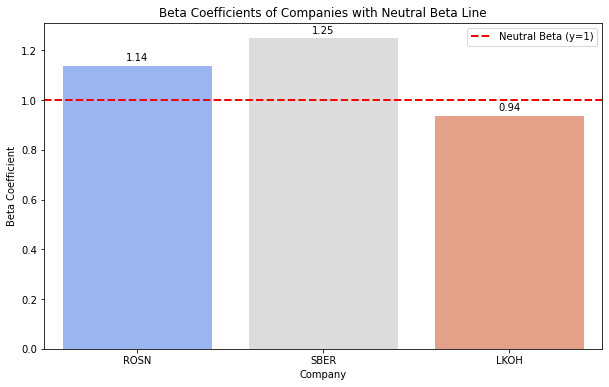

In [127]:
data = {
    'Company': ['ROSN', 'SBER', 'LKOH'],
    'Beta': [Beta_ROSN, Beta_SBER, Beta_LKOH]}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

sns.barplot(x='Company', y='Beta', data=df, palette='coolwarm')

plt.axhline(1, color='red', linestyle='--', linewidth=2, label='Neutral Beta (y=1)')

for index, row in df.iterrows():
    plt.text(index, row['Beta'] + 0.02, f'{row["Beta"]:.2f}', color='black', ha='center')

plt.xlabel('Company')
plt.ylabel('Beta Coefficient')
plt.title('Beta Coefficients of Companies with Neutral Beta Line')

plt.legend()

plt.show()

Таким образом, Сбер и роснефть - агрессивные акции, растут больше чем рынок в периоды роста и падают сильнее рынка в периоды падения. для Лукойла коэффициент меньше 1, что свидетельствует о том, что акции "Лукойл" менее волатильны, чем рынок в целом. Это делает акции "Лукойл" более стабильными и менее рискованными для инвесторов, которые ищут более умеренные, но более предсказуемые доходы. Эти акции могут не давать таких высоких доходов в периоды быстрого роста рынка, но и их падения во время спадов будут менее ощутимы.

## Гипотезы

H0: Матожидание цены Роснефти за последнее полугодие (январь-апрель 2024) равняется цене после дивидендного гэпа в 2023 году.

H0: Во время налогового периода экспортёры влияют на курс доллара, распродавая валюту.

H0: Объявление о размерах дивидендов не влияет на стоимость акций компаний до момента выплаты.

H0: Увеличение объемов торгов на бирже по включенным в анализ акциям не связано с волатильностью рыночного индекса IMOEX.

## Предполагаемое машинное обучение

На данный момент мы предполагаем, что построенная задача машинного обучения будет прогнозировать будущие катировки акций взятых компаний на основе предыдущих данных, а также стоимостную корзину, фьючерсов на нефть и рубль-доллар при помощи линейной модели (обученной градиентным спуском) с коэффициентом регуляризации... Может быть (вероятнее) по мере продвижения работы нам придут новые идеи